In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re
import json

from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import aws comprehend
import boto3

In [163]:
STOPWORDS = {'i', 'we', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again',
                 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an',
                 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off',
                 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are',
                 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down',
                 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when',
                 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then',
                 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has',
                 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if',
                 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}

def clean_html(value):
    soup = BeautifulSoup(value, 'html.parser')
    desc = soup.find(id='jobDescriptionText').text.replace("\n", " ").replace("  ", " ")
    for word in stopwords.words('english'):#STOPWORDS:
        desc = desc.lower().replace(" " + word + " ", " ")
    
    return desc


def preprocessing(filename, file_format):
    if file_format == 'csv':
        df = pd.read_csv(filename)
        df['country'] = df['country']
        df['posting_date'] = pd.to_datetime(df['crawl_timestamp']).dt.date
        df['title'] = df['job_title']
        df['employer'] = df['company_name']
        df['id'] = df['uniq_id']
        df['industry'] = df['industry']
        df['description'] = df['job_description'].apply(clean_html)
    else:
        df = pd.read_json(filename, lines=True)
        df['country'] = 'India'
        df['posting_date'] = pd.to_datetime(df['post_date'])
        df['employer'] = df['company_name']
        df['title'] = df['job_title']
        df['id'] = df['uniq_id']
        df['industry'] = df['category']
        df['description'] = df['job_description'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
    
    df['source'] = 'Indeed'
        
    return df[['posting_date', 'description', 'title', 'employer', 'industry', 'id', 'source', 'country']]

In [164]:
filename = "../01_data/marketing_sample_for_trulia_com_real_estate_20190901_20191031_30k_data.csv"
filename2 = "../01_data/marketing_sample_for_indeed_co_in-indeed_co_in_job__20201101_20201231__5k_data.ldjson"

In [165]:
pd.read_csv(filename)

,job_title,job_description,job_type,categories,location,city,state,country,zip_code,address,...,employer_phone,employer_logo,companydescription,employer_location,employer_city,employer_state,employer_country,employer_zip_code,uniq_id,crawl_timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345.0,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Chicago, IL",Chicago,IL,United States,NaN,NaN,...,NaN,NaN,Vibes Corp. reputation was built and establish...,NaN,NaN,NaN,United States,NaN,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Festus, MO",Festus,MO,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Staples is The Worklife Fulfillment Company, h...","Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404.0,3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,Bilingual Teller,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Lakewood, CO 80226",Lakewood,CO,United States,80226,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,Moneytree is a family-run business that has be...,NaN,NaN,NaN,United States,NaN,db18d0e2de28df6e1e605a3800ffd574,2019-10-25 22:42:37 +0000
29998,"Rental Consultant - Harrison, OH","<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Harrison, OH 45030",Harrison,OH,United States,45030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,47f8d7f320223b6f043ef5c345676902,2019-10-25 16:56:18 +0000
29999,Product Support Specialist 5,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Melbourne, FL 32940",Melbourne,FL,United States,32940,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,d2a18fb9f52495aa7876d4470e5acc61,2019-10-25 01:39:48 +0000
30000,Marketing Strategist (Contract),"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"San Diego, CA",San Diego,CA,United States,NaN,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,Ajinomoto Bio-Pharma Services is a fully integ...,NaN,NaN,NaN,United States,NaN,ce699d2e94a52dfebb13bcf70ed5ffd7,2019-08-23 15:36:47 +0000


In [166]:
pd.read_json(filename2, lines=True)

,uniq_id,crawl_timestamp,url,job_title,category,company_name,city,state,country,post_date,...,dataset,is_remote,postdate_in_indexname_format,fitness_score,apply_url,company_description,test_contact_email,contact_email,inferred_salary_from,inferred_salary_to
0,4c25220299c8d5b46e14ea657ab4b062,2020-12-16 04:31:07 +0000,https://www.indeed.co.in/viewjob?jk=8e946b148b...,"Product Manager, RatingsXpress®",Engineering,S&P Global,Oragadam,Tamil Nadu,IN,2020-12-16,...,[job_board],false,2020.12.11,10,NaN,NaN,NaN,NaN,NaN,NaN
1,687c07a006634d1541ed2ae90d90cce5,2020-11-19 05:10:38 +0000,https://www.indeed.co.in/viewjob?jk=e8de0f5475...,GS Finance Capacity Analysis Lead,Human Resources,The Boston Consulting Group,Gurgaon,Haryana,IN,2020-11-19,...,[job_board],false,2020.11.11,10,https://sjobs.brassring.com/TGnewUI/Search/hom...,YOU BRING (EXPERIENCE & QUALIFICATIONS),NaN,NaN,NaN,NaN
2,376829fb851d36630d75646c1e638a91,2020-11-19 19:46:25 +0000,https://www.indeed.co.in/viewjob?jk=68b3006d27...,Site Reliability Engineer,Engineering,"JPMorgan Chase Bank, N.A.",Hyderabad,Telangana,IN,2020-11-18,...,[job_board],false,2020.11.11,10,https://jpmc.fa.oraclecloud.com/hcmUI/Candidat...,We recognize that our people are our strength ...,NaN,NaN,NaN,NaN
3,4196e3559b41ae3462eebe83d464157f,2020-12-07 12:03:44 +0000,https://www.indeed.co.in/viewjob?jk=a6ebde7e00...,Content Writing Internship,Social Media,Amatra Hotels & Resorts,Delhi,Delhi,IN,2020-12-07,...,[job_board],false,2020.12.01,10,NaN,True to our name with roots in ancient Indian ...,NaN,NaN,NaN,NaN
4,f725bd324d3ace57f3feeb6118962f12,2020-12-16 13:07:22 +0000,https://www.indeed.co.in/viewjob?jk=b9c3915d13...,Recruitment Professional | Part-time | Incenti...,Bpo,Spade Solutions,Patna,Bihar,IN,2020-12-16,...,[job_board],true,2020.12.11,10,NaN,Your job involves –,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,c3a45601b6e0c64d15efe720249d1aec,2020-12-30 10:20:17 +0000,https://www.indeed.co.in/viewjob?jk=cbfc37e2c7...,Sales Executive,Sales,Goodwill wealth management Pvt Ltd,Bhandup,Maharashtra,IN,2020-12-30,...,[job_board],false,2020.12.22,10,NaN,Research and identify new market opportunities.,NaN,NaN,NaN,NaN
4996,a3dd26cc5844a829f27f8188392034ee,2020-12-19 09:50:56 +0000,https://www.indeed.co.in/viewjob?jk=9ae8ecde05...,Tele Caller Executive,Sales,Tejarat Marketing,Gujarat,NaN,IN,2020-12-19,...,[job_board],false,2020.12.11,9,NaN,Job Type: Full-time,NaN,NaN,NaN,NaN
4997,8b4844ab2f8ea987fb546a37a9c341c3,2020-12-24 08:10:39 +0000,https://www.indeed.co.in/viewjob?jk=3d08cbe253...,IT Quality Analyst 2 - C10,Manufacturing,Citi,Noida,Uttar Pradesh,IN,2020-12-24,...,[job_board],false,2020.12.22,10,NaN,Qualifications:,NaN,NaN,NaN,NaN
4998,936e9bc045dc74ded3c809c261640c7d,2020-11-26 01:42:56 +0000,https://www.indeed.co.in/viewjob?jk=40343cdada...,Electrical Engineer,Electrical,AJ Career,Pune,Maharashtra,IN,2020-11-25,...,[job_board],false,2020.11.22,10,https://private-jobs.fresherslive.com/job/aj-c...,NaN,NaN,NaN,NaN,NaN


In [167]:
usa = preprocessing(filename, file_format='csv')
india = preprocessing(filename2, file_format='json')

In [168]:
usa.sample(5)

,posting_date,description,title,employer,industry,id,source,country
19837,2019-08-25,earn big $$$ automotive salespeople needed gr...,Senior Sales Specialist,Long Island Motors,NaN,3207e174c57df2e5bf8be21893bf400d,Indeed,United States
22146,2019-10-24,"investigate, evaluate, resolve claims made c...",VAULT-Claims Analyst– Homeowners Property/Fine...,Allied World Assurance Company,NaN,e08aff2668fbeba7d8526f4ea9e1c6b8,Indeed,United States
10898,2019-09-28,project manager support greater chicago area ...,Construction Project Manager,Kewaunee Scientific Corporation,NaN,e62b0e7765bf9f635bd67815888b955b,Indeed,United States
5372,2019-10-24,job details description job title: sap fun...,SAP Functional Business Analyst,Indrasoft,NaN,6f0f7ec8885c2f3901fc00cd07c8413d,Indeed,United States
29450,2019-08-25,get fast track rewarding career national car...,Rental Sales Agent,Enterprise Holdings,NaN,88b51b988d7cec1374114dc8032f9eba,Indeed,United States


In [169]:
india.sample(5)

,posting_date,description,title,employer,industry,id,source,country
3598,2020-12-16,hands-on development experience golang python ...,Software Developer,C P Careers Private Limited,IT,0bf96e00bfd18a6a5a16733a98b37baf,Indeed,India
1666,2020-12-27,conceptualize execute manage social media mark...,Marketing and Business Development Intern,XO Headquarter,Marketing,6818862dedb079b950b56a277e7dc82d,Indeed,India
693,2020-11-25,tasks: develop webui 5g mobile radio tester - ...,MMI-Developer for Mobile Radio Tester,ROHDE & SCHWARZ GmbH & Co. KG,IT,4c2253cb36a8ebd863d39ff3de1ea298,Indeed,India
1598,2020-10-31,job summary: top notch mnc company looking hir...,BPO TELECALLER,REDICAL SOLUTIONS,Education,99c4b640b2b1e1c80e394b83885f3c71,Indeed,India
3376,2020-12-30,multiple positions poornima international scho...,Teaching Faculty,Poornima International School,Admin,14fb6a66f1565819f170963dc74961a9,Indeed,India


In [170]:
indeed_main = pd.concat([usa, india])

In [171]:
indeed_main[indeed_main['title'].str.contains('(?i)(data engineer|machine learning|data scientist|data analyst)', regex=True)]['title'].unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array(['Senior Data Scientist, Wholesale Credit Technology',
       'Senior Data Engineer- Platform Development', 'Data Analyst',
       'Jr. Data Analyst Compliance', 'Data Scientist',
       'Customer Data Analyst', 'Business and Data Analyst Manager',
       '(Temporary) Researcher and Data Analyst, Fine Arts',
       'Sr Data Analyst', 'Senior Data Engineer, BI and Analytics (5905)',
       'Sr. Fraud Data Analyst', 'Sr. IT Data Engineer', 'Data Engineer',
       'Sr Demand Forecasting Data Scientist',
       'data scientist - Seattle, WA', 'Finance Data Analyst',
       'Data Engineering Manager', 'Customer Service Data Analyst',
       'Business Data Analyst', 'Senior Data Analyst',
       'Senior Marketing Data Analyst', 'Technical Data Analyst',
       'Lead Data Scientist',
       'Product Management Lead - Cloud and Machine Learning',
       'Data Scientist - (2 Positions)',
       'Senior Director of Product Management, Machine Learning',
       'Specialist SA, Machine Learn

In [172]:
indeed_main = indeed_main[indeed_main['title'].str.contains('(?i)(data engineer|machine learning|data scientist|data analyst)', regex=True)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [173]:
indeed_main.to_csv('../indeedjobs.csv', index=False)

### AWS Key Phrase Extraction

In [147]:
indeed_aws = indeed_main[indeed_main['description'].apply(lambda x: len(x.encode('utf-8'))) <= 5000]

In [ ]:
sample_frac = 1 # % of total records for sample processing.
cf_score = 0.8  # confidence score threshold for key phrases

# Call AWS comprehend to extract key phrases
s3 = boto3.Session(

)

comprehend = s3.client(service_name='comprehend', region_name='us-east-2')

print('Calling DetectKeyPhrases')

df_list = []

for i in range(round(sample_frac * len(indeed_main))):
    if len(indeed_main["description"].iloc[i].encode('utf-8')) <= 5000:  # AWS' limitation on one request
        dump_json = json.dumps(comprehend.detect_key_phrases(Text=indeed_main["description"].iloc[i], 
                                                           LanguageCode='en'), sort_keys=True, indent=4)
        df_phrases = pd.json_normalize(json.loads(dump_json)['KeyPhrases'])
        df_phrases['id'] = indeed_main["id"].iloc[i]
        df_list.append(df_phrases)
    else:
        continue # to be handled
        
df = pd.concat(df_list)
print('End of DetectKeyPhrases\n')

In [97]:
df

,BeginOffset,EndOffset,Score,Text,id
0,1,16,0.994855,job description,3705b6bdceec9a65cae63741ecff9989
1,19,31,0.988749,bank america,3705b6bdceec9a65cae63741ecff9989
2,40,107,0.899997,senior data scientist analytics team digital t...,3705b6bdceec9a65cae63741ecff9989
3,115,142,0.999753,wholesale credit technology,3705b6bdceec9a65cae63741ecff9989
4,145,159,0.987955,scope projects,3705b6bdceec9a65cae63741ecff9989
...,...,...,...,...,...
92,2634,2646,0.855729,master’s/phd,076196ef66cd3e231bd0d1e97eed18db
93,2648,2658,0.973829,statistics,076196ef66cd3e231bd0d1e97eed18db
94,2660,2749,0.812369,economics quantitative discipline database mar...,076196ef66cd3e231bd0d1e97eed18db
95,2750,2774,0.827273,newer emerging languages,076196ef66cd3e231bd0d1e97eed18db


In [98]:
# Generate the dataframe of skills
df_skills = pd.DataFrame(df[df['Score'] >= cf_score][['id','Text']])
df_skills.columns = ['id','skill']
df_skills['type'] = ''

In [99]:
df_skills.groupby(['skill']).count()[df_skills.groupby(['skill']).count()['id']>10].sort_values('id',ascending=False)

,id,type
skill,,
ability,108,108
data,94,94
world,68,68
role,56,56
company,47,47
...,...,...
globe,11,11
findings,11,11
economics,11,11


In [100]:
plot_table = df_skills.groupby(['skill']).count()[df_skills.groupby(['skill']).count()['id']>5].sort_values('id',ascending=False).reset_index()

In [101]:
plot_table['skill'].unique()

array(['ability', 'data', 'world', 'role', 'responsibilities', 'company',
       'sexual orientation', 'team', 'national origin', 'bachelor',
       'gender identity', 'experience', 'sales', 'solutions',
       'machine learning', 'business', 'customers', 'position', 'people',
       'opportunities', 'machine', 'computer science', 'requirements',
       '3+ years', 'statistics', 'insights', 'qualifications', 'analysis',
       'analytics', 'best practices', 'employees', 'organization',
       'qualified applicants', 'disability', 'large data sets',
       '’s degree', '5+ years', 'information', 'problems', 'clients',
       'opportunity', 'consideration employment',
       'equal opportunity employer', 'data analyst', 'work', 'age',
       'tools', 'reports', 'actionable insights',
       'protected veteran status', 'models', 'marital status',
       'north america', 'issues', 'today', 'recommendations', '2+ years',
       'large datasets', '•', 'mission', 'degree', 'skills', 'duties',

In [102]:
excluded_keywords = ['sexual orientation', 'world', 'gender identity', 'position']

In [103]:
plot_table = plot_table[~plot_table['skill'].isin(excluded_keywords)]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0, flags=flags)


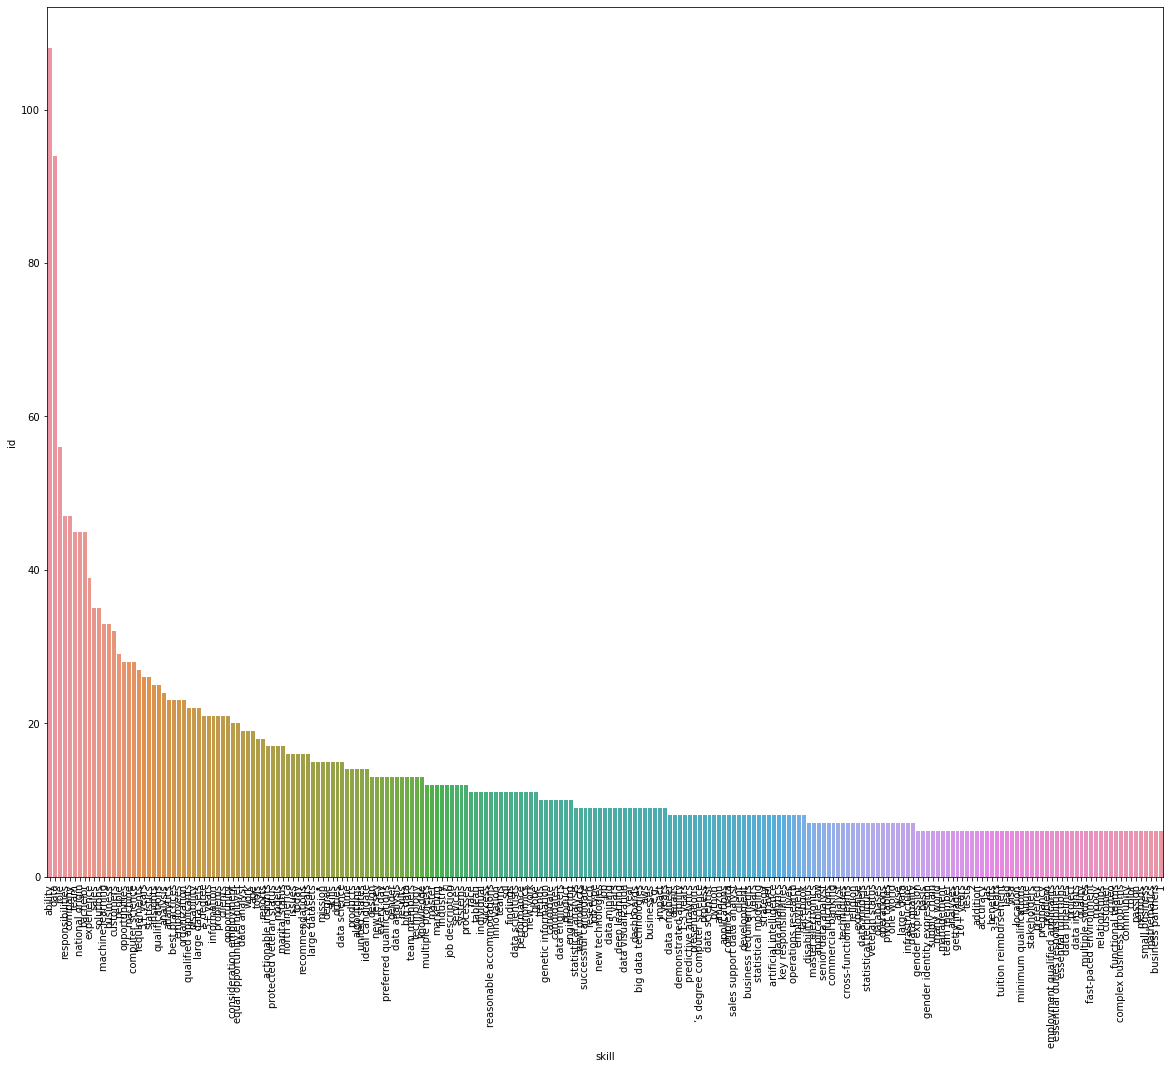

In [104]:
plt.figure(figsize=(20,16))
sns.barplot(data=plot_table, x='skill', y='id')
plt.xticks(rotation=90)

### Azure Named Entities Recognition (NER)

In [ ]:


from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

# Example function for recognizing entities from text
def entity_recognition_example(client):
    for desc in indeed_main.description[:5]:
        try:
            # documents = ["I had a wonderful trip to Seattle last week."]
            documents = [desc]
            # documents = list(indeed_main.description[5:10])
            result = client.recognize_entities(documents = documents)[0]
            print("*"*20)
            print("Named Entities:\n")
            for entity in result.entities:
                print("\tText: \t", entity.text, "\tCategory: \t", entity.category, "\tSubCategory: \t", entity.subcategory,
                        "\n\tConfidence Score: \t", round(entity.confidence_score, 2), "\tLength: \t", entity.length, "\tOffset: \t", entity.offset, "\n")

        except Exception as err:
            print("Encountered exception. {}".format(err))

entity_recognition_example(client)

#### Evaluate Azure NER

In [122]:
for desc in indeed_main.description[:10]:
    input("")
    print("\n\n", desc)



  job description:  bank america seeking senior data scientist analytics team digital transformation program within wholesale credit technology.  scope projects include descriptive, predictive prescriptive analytics. cultivate team infrastructure support modeling analyzing loan data wholesale credit business lines. develop value-added analytics solutions support revenue generation, business insight, risk management, operational efficiency, regulatory compliance, loan pricing, pre post-sale loan facility research. solutions must overcome issues complex data (e.g., vldb, multi-structured, "big data", etc.) well deployment advanced techniques (e.g., machine learning, text mining, statistical analysis, etc.) deliver insights. determine best practices areas data science machine learning. facilitate use technologies within loan business loan system applications including precision lender wholesale credit business processes. liaise global banking markets enterprise level teams determine bes



 senior data engineer overview: weedmaps looking senior data engineer help architect, build, scale, maintain world-class data platform. seeking qualified individual eager ensure ability store, process, analyze data keeps business growth ambitions. would early hire fast growing startup significant impact design implementation engineering vision company team grows. impact make: enterprise-wide data modeling database design, processes procedures data governance, change management, taxonomy management master data management. working engineering teams data sme, provide architecture design, development oversight assistance ensuring holistic data strategy scalable data flow architecture. produce documentation standards guidelines technical functional audiences, data flow architecture documentation related platform services. establishing managing ongoing maturity company's business glossary, driving consistent end-to-end data driven integration strategy. develops metadata management reposito



  blue skies, data analyst primarily responsible successful completion project activities directed project manager. project activities include understanding customers’ business order complete requirements analysis definition, design solution, prototypes testing, deployment solution post go-live support. data analyst works direction engagement project manager may also required lead small medium engagements. data analyst’s responsibilities fall three major categories: delivery, practice development, sales & marketing. delivery sustain average billable utilization 100% maintain high level customer satisfaction exceeding client expectations self-manage completion assigned activities practice development participate proactively corporate initiatives provide operational support blue skies creation refinement deliverables processes (focused project delivery) sales / sales collaboration & marketing provide sales & business development support assigned maintain expected levels activity within



  overview  position reports director compliance operations and, responsible acquire, manage, analyze data report results trends associated compliance risk enable company quickly precisely align resources. responsibilities include items ensuring data quality, identifying resolving issues data logical mathematical nature, identification trends large datasets; develop automation, reporting self-service capabilities duties assigned. ability source data point sale systems associated databases/data marts needed pre-examination, examination, customer remediation reporting package needs.  responsibilities  analyze data associated customer complaints, issues, regulatory examinations, compliance testing findings along associated products/services, financial data, servicing channel geographical data identify shifts trends level within enterprise hierarchy vertical horizontal views. build produce reporting key risk indicators trends associated compliance risk. take active part development conti



   req. id: 144857  micron technology’s vision transform world uses information enrich life commitment people, innovation, tenacity, collaboration, customer focus allows us fulfill mission global leader memory storage solutions. means conducting business integrity, accountability, professionalism supporting global community.  smart manufacturing & ai data scientist micron technology, inc., work world-class team data engineers, business intelligence experts, software engineers discover data insights unobservable traditional business solutions. draw broad background data-mining techniques mathematics, statistics, information technology, machine learning, data engineering, design experiments, visualization, text mining discover insightful patterns data. position, take exciting projects across enterprise business processes bring data science methods opportunities sales, supply chain, finance, corporate strategy, marketing, business areas.  responsibilities include, limited to:  strong un



   description customer data analyst bmw responsible providing expertise, insight innovation area data management, acquisition enhancement goal providing new insights recommending best practices health digital aspects bmw’s customer experience. incumbent responsible analyzing understanding online marketing, website traffic offline data, partnering various teams grow improve customer experience throughout journey. ensuring data quality, segmentation security data digitally place. ideal candidate work develop strategic data enrichment programs optimize available data targeted marketing activities customer centric platform. duties include analysis quality data capture techniques, educating internal customers relevance data business, championing strategies, identifying data gaps developing best practices identify data opportunities easy report effective digital measurement. incumbent also partner internal teams improve data integrity help develop new innovative ways impact positive custo



   managerial direction, wide latitude independent judgment initiative, business data analyst manager (bdam) responsible identifying troubleshooting various issues technical business resolution escalation, appropriate. bdam may responsibility supervising analytical staff. specific duties responsibilities include limited to: collects analyzes statistical quantitative data, employing standard data collection statistical techniques, order produce summary descriptive projective results agency decision making. monitors, reviews, controls coordinates subordinates’ activities, assignments, projects cases personal observation, review statistical narrative data, reports, correspondence. compare work completed milestone expectations, meet program unit objectives. prepare, distribute, schedule work activities assignments based knowledge nature duration activities assignments performed. use basic scheduling techniques, desires abilities staff possible, order provide timetable efficient completio



  analyst update internal tracking, create reporting respond escalations within defined responsibilities. main duties / responsibilities build & qa billing/pricing element tables (interchange, auth, data capture, etc.). provide assistance feedback senior data analyst(s) respond operations, product sales escalations. manage card brand 3rd party invoices; query monthly invoices generate p&l reports coordination it/dba commissions/finance teams. build maintain cross-processor interchange code billing descriptor mapping grids (us & canada regions). analyze impact card brand updates/changes production pricing billing elements. develop portfolio specific reporting/metrics using business intelligence tools e.g. ms power bi.  requirements bachelor’s degree preferred. 3+ years financial and/or payments acquiring position. acquiring and/or payment processing industry experience preferred. good understanding clearing settlement concepts (visa, mastercard & pin debit networks). strong proficienc



  overview  working part dedicated research team heart fine arts division, individual responsible data input consolidation well management object database. / responsibility partner researcher team build robust database, specialists rely integrity data utilize resource potential business getting.  contract position: december 20, 2019 responsibilities  acting department point person newly identified property, information leads come central point input, upkeep development object database fine arts division. building comprehensive complete lists artists’ oeuvres researching full market history current ownerships works art consolidating intelligence internal sources gathering intelligence external sources centralizing existing internal data  jointly manage object database updating pricing ownership daily entering new intelligence expand database  qualifications  prior data analyst experience strongly preferred exceptional excel proficiency proficiency ms word, outlook general familiarity 



 expedia carrentals small rapidly growing company within expedia group portfolio premier car rental booking company web. carrentals powers three different brands across multiple points sale single common platform, bringing suppliers customers together find right car best price. carrentals offers phenomenal opportunity work startup-like environment backed resources, benefits, network large, multi-national online e-commerce company.  senior data analyst, carrentals finance tech team, build solutions automate rhythm business functions, apply statistical forecast models support financial operational forecasting, use data science solve problems problem isn’t obvious. cr finance small team big ambitions transform role finance business use data. passionate data analysis? master vb python? find travel fascinating always wondered looks like behind scenes?  position carrentals finance building team technologists objective transforming finance business. looking someone passion using data hypoth

In [121]:
key = "fb988bc413cd4f819c960d027fe0f0eb"
endpoint = "https://mads-milestone1-ds-skills.cognitiveservices.azure.com/"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

# Example function for recognizing entities from text
def entity_recognition_example(client):
    for desc in indeed_main.description[:5]:
        try:
            # documents = ["I had a wonderful trip to Seattle last week."]
            documents = [desc]
            # documents = list(indeed_main.description[5:10])
            result = client.recognize_entities(documents = documents)[0]
            print("*"*20)
            print("Named Entities:\n")
            for entity in result.entities:
                print("\tText: \t", entity.text, "\tCategory: \t", entity.category, "\tSubCategory: \t", entity.subcategory,
                        "\n\tConfidence Score: \t", round(entity.confidence_score, 2), "\tLength: \t", entity.length, "\tOffset: \t", entity.offset, "\n")

        except Exception as err:
            print("Encountered exception. {}".format(err))

entity_recognition_example(client)

********************
Named Entities:

	Text: 	 america 	Category: 	 Location 	SubCategory: 	 GPE 
	Confidence Score: 	 0.62 	Length: 	 7 	Offset: 	 24 

	Text: 	 senior data scientist 	Category: 	 PersonType 	SubCategory: 	 None 
	Confidence Score: 	 0.78 	Length: 	 21 	Offset: 	 40 

	Text: 	 analytics 	Category: 	 Skill 	SubCategory: 	 None 
	Confidence Score: 	 0.81 	Length: 	 9 	Offset: 	 62 

	Text: 	 digital transformation 	Category: 	 Skill 	SubCategory: 	 None 
	Confidence Score: 	 0.96 	Length: 	 22 	Offset: 	 77 

	Text: 	 technology 	Category: 	 Skill 	SubCategory: 	 None 
	Confidence Score: 	 0.64 	Length: 	 10 	Offset: 	 132 

	Text: 	 predictive 	Category: 	 Skill 	SubCategory: 	 None 
	Confidence Score: 	 0.7 	Length: 	 10 	Offset: 	 181 

	Text: 	 analytics 	Category: 	 Skill 	SubCategory: 	 None 
	Confidence Score: 	 0.91 	Length: 	 9 	Offset: 	 205 

	Text: 	 modeling 	Category: 	 Skill 	SubCategory: 	 None 
	Confidence Score: 	 0.98 	Length: 	 8 	Offset: 	 254 

	Tex